In [1]:
from google.colab import files
uploaded = files.upload()

Saving sales_data.csv to sales_data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Load your dataset
df = pd.read_csv('sales_data.csv', parse_dates=['Date'])

# Show first few rows
df.head()

,Date,Product,Region,Sales_Rep,Units_Sold,Unit_Price,Revenue
0,2023-04-13,Smartphone,South,Alice,18,128.04,2304.72
1,2023-12-15,Laptop,North,Charlie,15,1132.05,16980.75
2,2023-09-28,Monitor,South,Diana,12,1176.04,14112.48
3,2023-04-17,Tablet,West,Bob,16,441.12,7057.92
4,2023-03-13,Monitor,West,Alice,8,1040.18,8321.44


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        500 non-null    datetime64[ns]
 1   Product     500 non-null    object        
 2   Region      500 non-null    object        
 3   Sales_Rep   500 non-null    object        
 4   Units_Sold  500 non-null    int64         
 5   Unit_Price  500 non-null    float64       
 6   Revenue     500 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.5+ KB


In [4]:
df.describe()

,Date,Units_Sold,Unit_Price,Revenue
count,500,500.000000,500.000000,500.000000
mean,2023-07-05 18:14:24,9.986000,781.328240,7930.526140
min,2023-01-01 00:00:00,1.000000,100.470000,132.110000
25%,2023-04-12 12:00:00,5.000000,416.397500,2549.515000
50%,2023-07-06 00:00:00,10.000000,782.495000,6591.060000
75%,2023-10-01 06:00:00,15.000000,1141.667500,12007.720000
max,2023-12-31 00:00:00,19.000000,1495.910000,27364.750000
std,NaN,5.395556,404.179098,6336.475503


***Are sales growing over time? Are there seasonal peaks?***

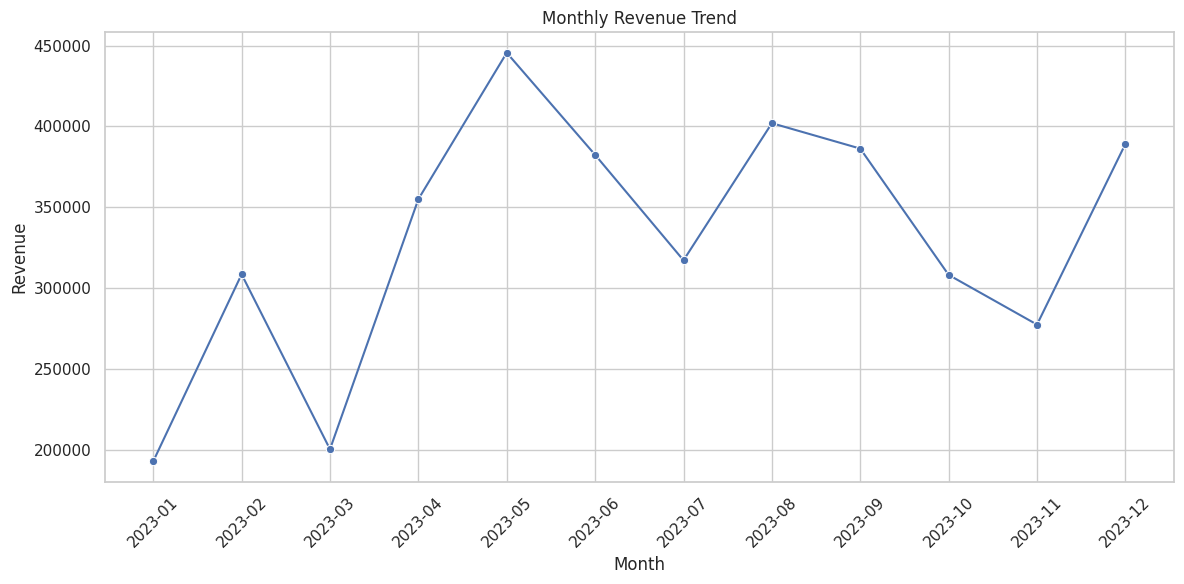

In [5]:
# Create a new column for Month (e.g., '2023-01')
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Group by Month and calculate total revenue
monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='Month', y='Revenue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Revenue showed significant month-to-month fluctuation throughout the year. The highest peak occurred in May, while the lowest revenue was observed in January and March. This suggests possible seasonality or campaign effects that could be further investigated to optimize future sales.

***Which products are the top earners?***

<ipython-input-6-429d095ffcba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_revenue, x='Revenue', y='Product', palette='Blues_d')


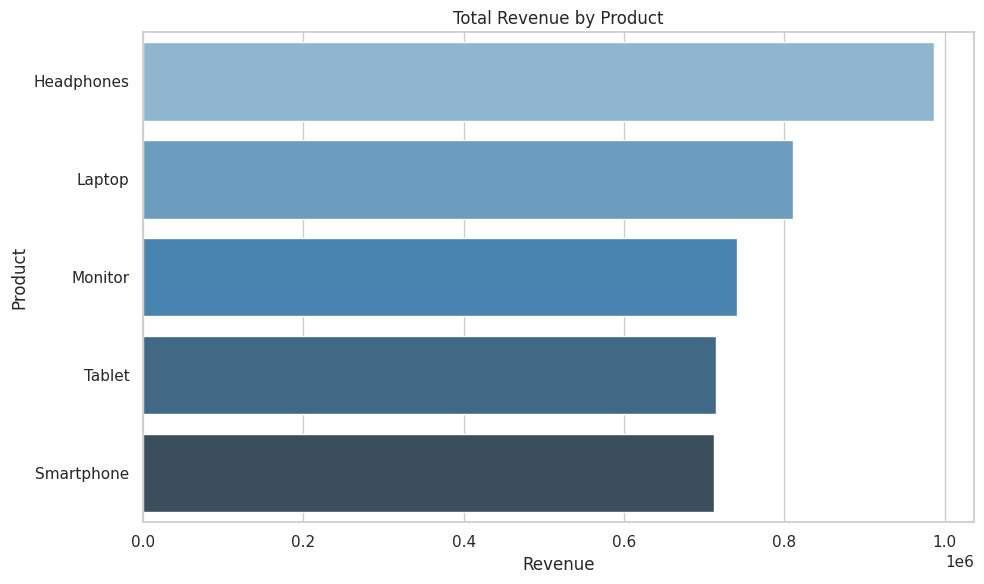

In [6]:
# Group data by Product and sum the revenue
product_revenue = df.groupby('Product')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)

# Plot revenue by product
plt.figure(figsize=(10, 6))
sns.barplot(data=product_revenue, x='Revenue', y='Product', palette='Blues_d')
plt.title('Total Revenue by Product')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

***Where are we earning the most? Are some regions underperforming?***

<ipython-input-7-ba2e448a6c1a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_revenue, x='Region', y='Revenue', palette='viridis')


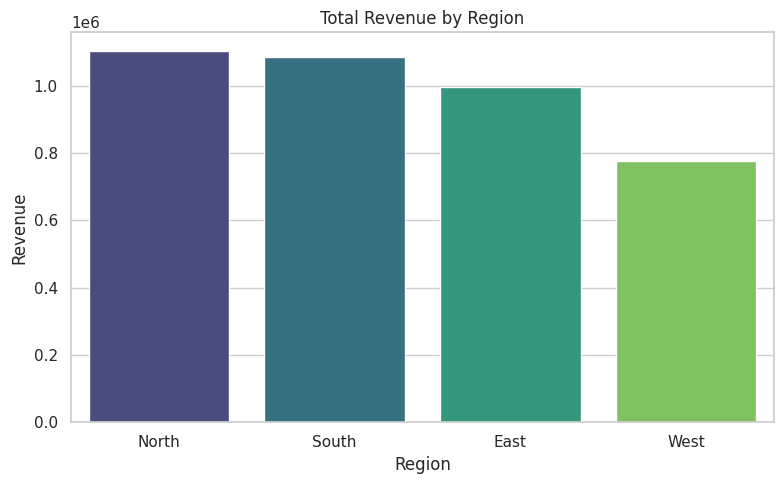

In [7]:
# Group data by Region and sum the revenue
region_revenue = df.groupby('Region')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)

# Plot revenue by region
plt.figure(figsize=(8, 5))
sns.barplot(data=region_revenue, x='Region', y='Revenue', palette='viridis')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

***Which products sell best in each region?***

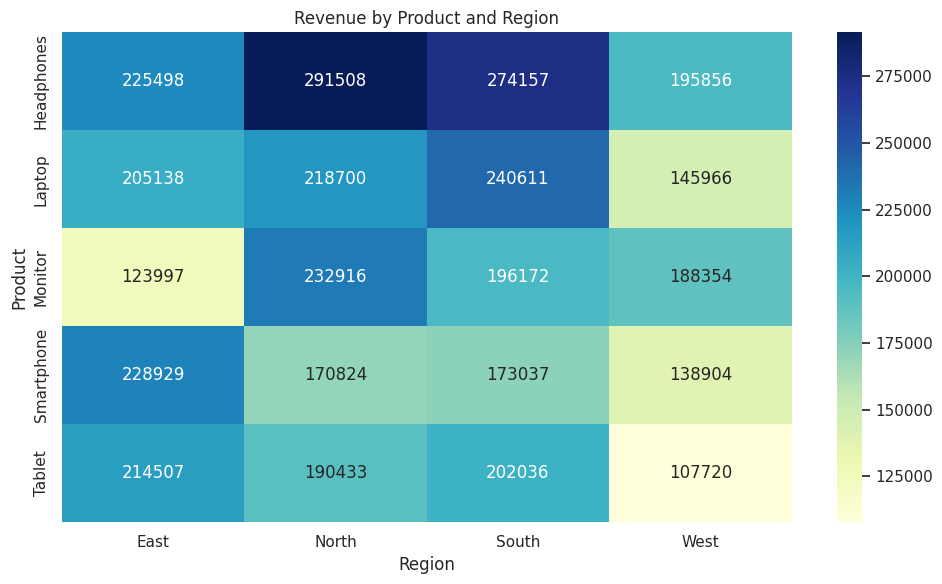

In [8]:
# Pivot table: total revenue by Region and Product
pivot = df.pivot_table(index='Product', columns='Region', values='Revenue', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Revenue by Product and Region')
plt.xlabel('Region')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

***Are certain products gaining popularity month-by-month?***

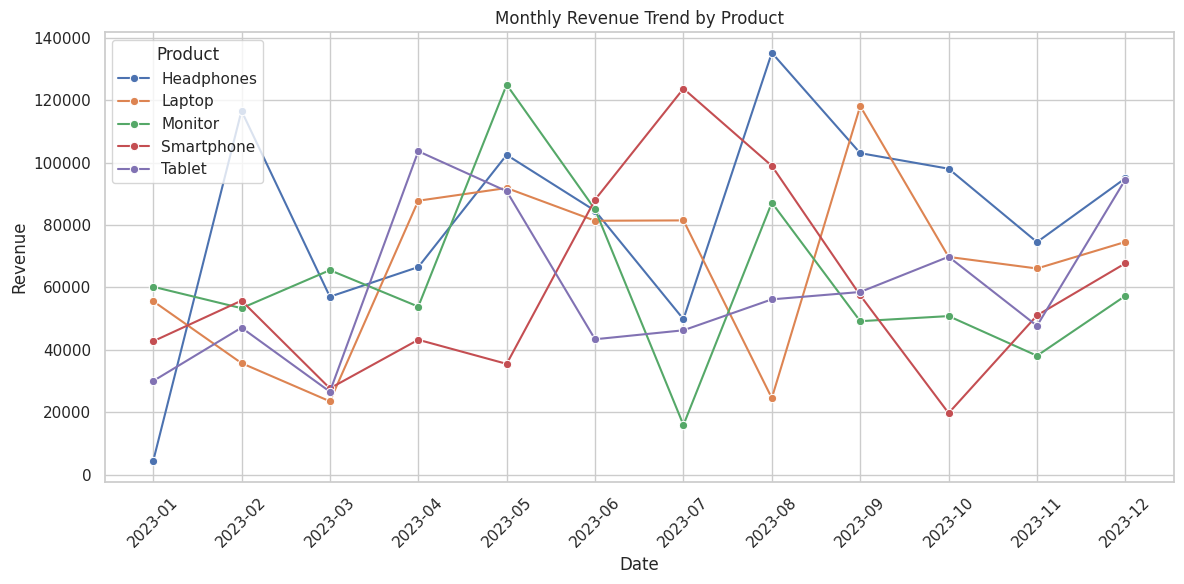

In [9]:
# Group by Month and Product, then sum revenue
monthly_product = df.groupby([df['Date'].dt.to_period('M').astype(str), 'Product'])['Revenue'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_product, x='Date', y='Revenue', hue='Product', marker='o')
plt.title('Monthly Revenue Trend by Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()